#### Simulation: Different spatial patterns to understand behavior of TDA adjacency method

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [2]:
NUM_OF_ITERATIONS = 50
GRID_SIZE = 10

# Set the random seed
np.random.seed(0)
RANDOM_SEED_LIST = np.random.randint(0, 1000, NUM_OF_ITERATIONS)

# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML'])


for iter in range(NUM_OF_ITERATIONS):
    print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    gdf_none = generate_grid_dataframe(GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)        # No spatial correlation
    gdf_positive = generate_grid_dataframe(GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED) 

    # Calculate Moran’s I
    moran_none = calculate_moran_i(gdf_none, GRID_SIZE)
    moran_positive = calculate_moran_i(gdf_positive, GRID_SIZE)

    for gdf in [gdf_none, gdf_positive]:
        for filter_method in ['up', 'down']:
        
            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold =None, filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Value')

            if filter_method == 'up' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 0
Max value: 29
Persistence intervals for dimension 0: [[ 0.  8.]
 [ 0.  8.]
 [ 0.  8.]
 [ 0.  9.]
 [ 0.  9.]
 [ 0.  9.]
 [ 0. 10.]
 [ 0. 10.]
 [ 0. 10.]
 [ 0. 11.]
 [ 0. 11.]
 [ 0. 11.]
 [ 0. 11.]
 [ 0. 11.]
 [ 0. 11.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 15.]
 [ 0. 16.]
 [ 0. 16.]
 [ 0. 16.]
 [ 0. 16.]
 [ 0. 16.]
 [ 0. 16.]
 [ 0. 17.]
 [ 0. 17.]
 [ 0. 17.]
 [ 0. 17.]
 [ 0. 17.]
 [ 0. 17.]
 [ 0. 17.]
 [ 0. 18.]
 [ 0. 18.]
 [ 0. 18.]
 [ 0. 18.]
 [ 0. 18.]
 [ 0. 19.]
 [ 0. 19.]
 [ 0. 19.]
 [ 0. 19.]
 [ 0. 20.]
 [ 0. 20.]
 [ 0. 20.]
 [ 0. 21.]
 [ 0. 21.]

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_43016/3718467807.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Max value: 19
Persistence intervals for dimension 0: [[ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 12.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 13.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 14.]
 [ 0. 15.]
 

In [3]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML
0,0,684,none,0.109936,up,100,1588.0,15.88,794.0,7.940
1,0,684,none,0.109936,down,100,898.0,8.98,449.0,4.490
2,0,684,positive,0.863524,up,100,1417.0,14.17,708.5,7.085
3,0,684,positive,0.863524,down,100,1329.0,13.29,664.5,6.645
4,1,559,none,0.041383,up,100,1627.0,16.27,813.5,8.135


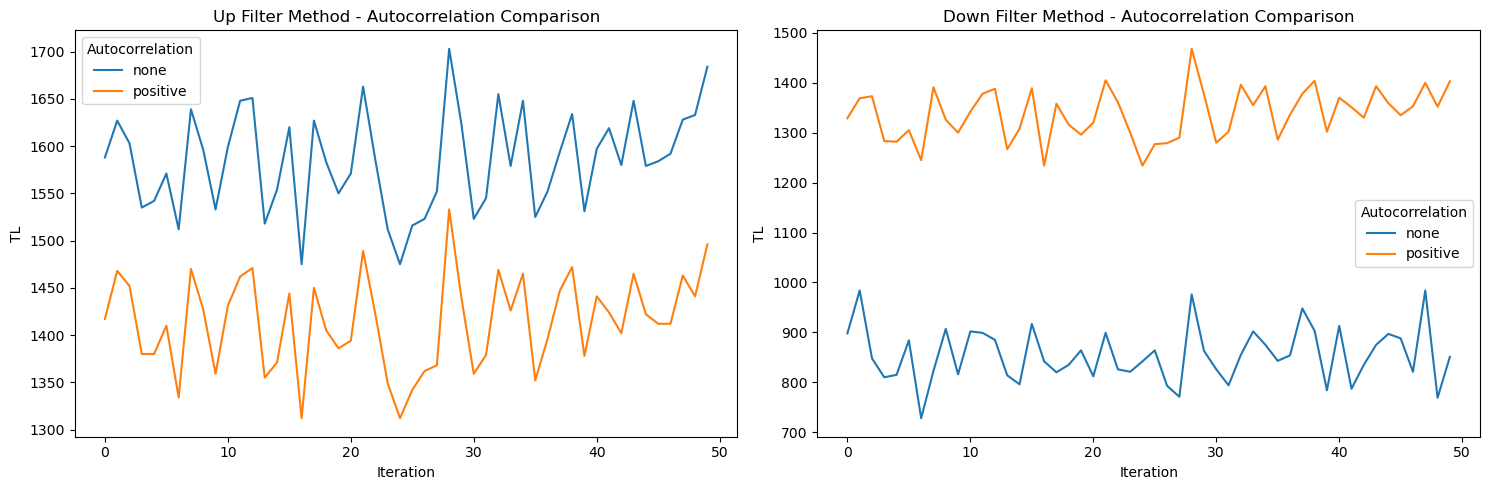

In [4]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


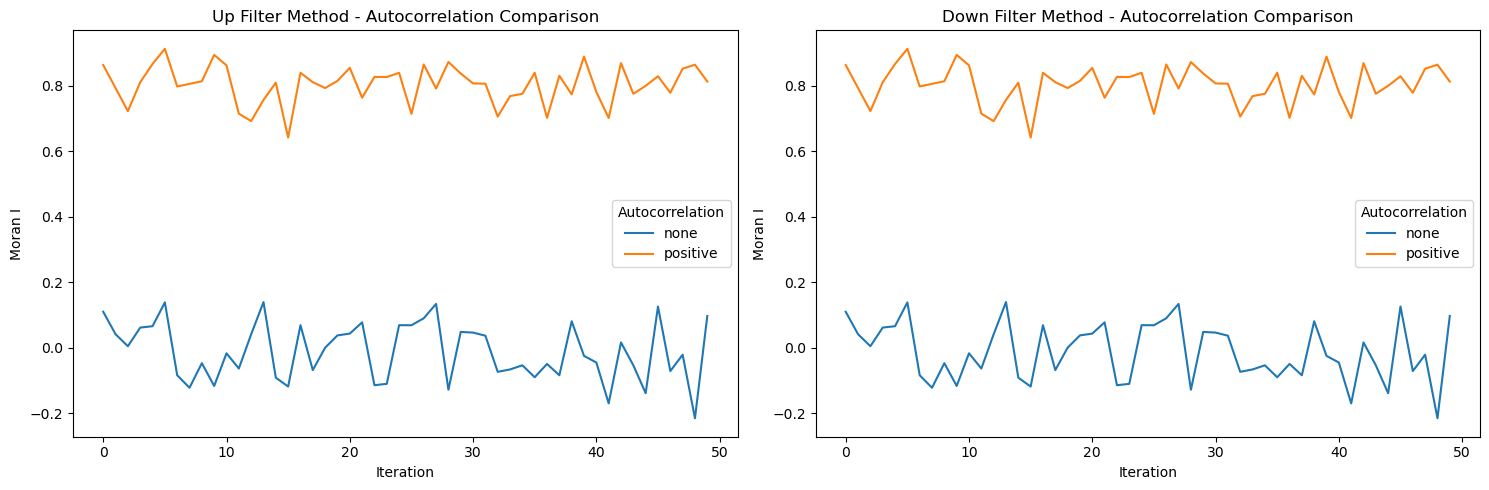

In [5]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['Moran I'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Moran I")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

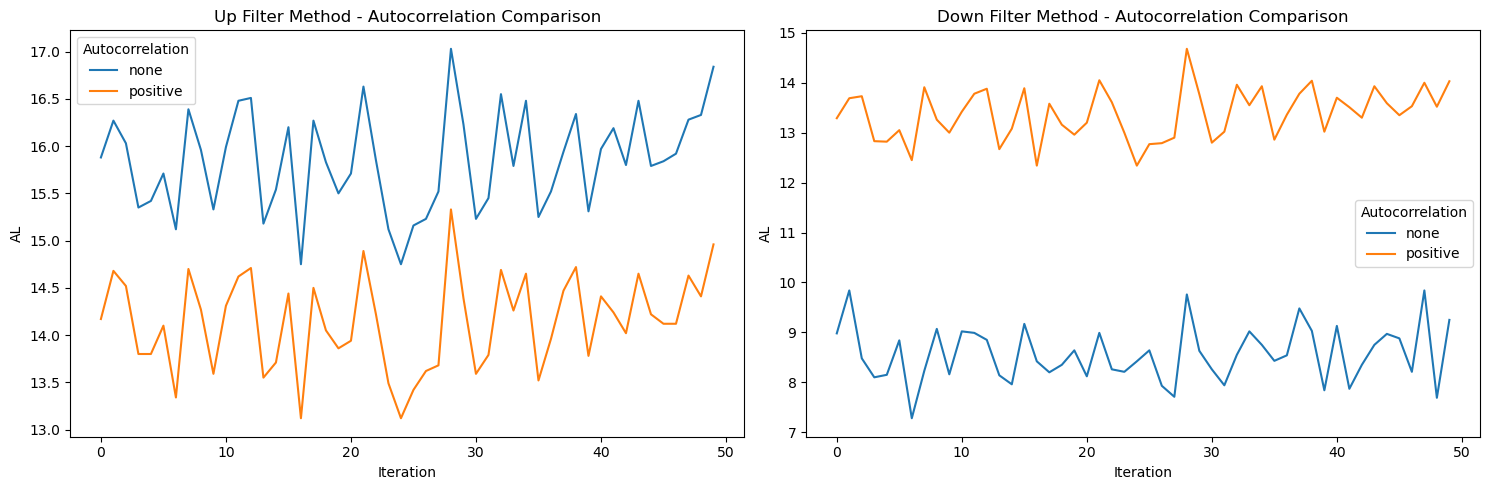

In [6]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


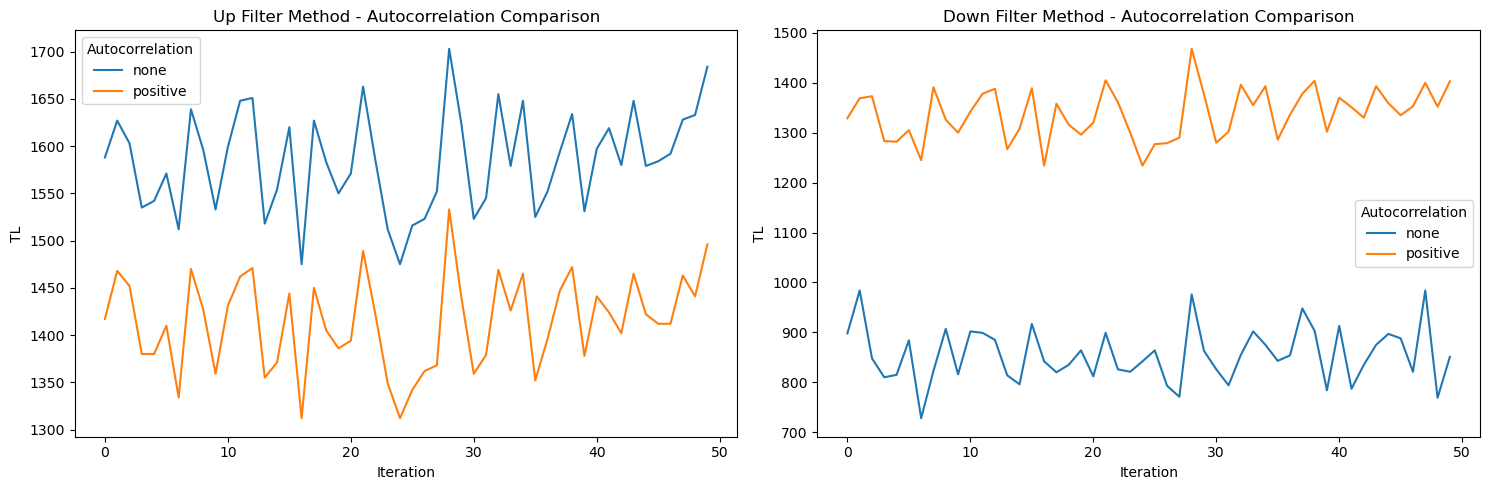

In [7]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


In [8]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML
0,0,684,none,0.109936,up,100,1588.0,15.88,794.0,7.940
1,0,684,none,0.109936,down,100,898.0,8.98,449.0,4.490
2,0,684,positive,0.863524,up,100,1417.0,14.17,708.5,7.085
3,0,684,positive,0.863524,down,100,1329.0,13.29,664.5,6.645
4,1,559,none,0.041383,up,100,1627.0,16.27,813.5,8.135


In [9]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AL'].describe()

count     mean       std    min      25%  \
Filter Method Autocorrlation                                             
down          none             50.0   8.5664  0.565786   7.28   8.1700   
              positive         50.0  13.3736  0.512524  12.34  13.0000   
up            none             50.0  15.8448  0.535530  14.75  15.4275   
              positive         50.0  14.1430  0.501029  13.12  13.7825   

                                 50%      75%    max  
Filter Method Autocorrlation                          
down          none             8.510   8.9875   9.84  
              positive        13.390  13.7775  14.68  
up            none            15.845  16.2700  17.03  
              positive        14.195  14.5150  15.33

In [10]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AML'].describe()

count    mean       std    min      25%     50%  \
Filter Method Autocorrlation                                                    
down          none             50.0  4.2832  0.282893  3.640  4.08500  4.2550   
              positive         50.0  6.6868  0.256262  6.170  6.50000  6.6950   
up            none             50.0  7.9224  0.267765  7.375  7.71375  7.9225   
              positive         50.0  7.0715  0.250514  6.560  6.89125  7.0975   

                                  75%    max  
Filter Method Autocorrlation                  
down          none            4.49375  4.920  
              positive        6.88875  7.340  
up            none            8.13500  8.515  
              positive        7.25750  7.665

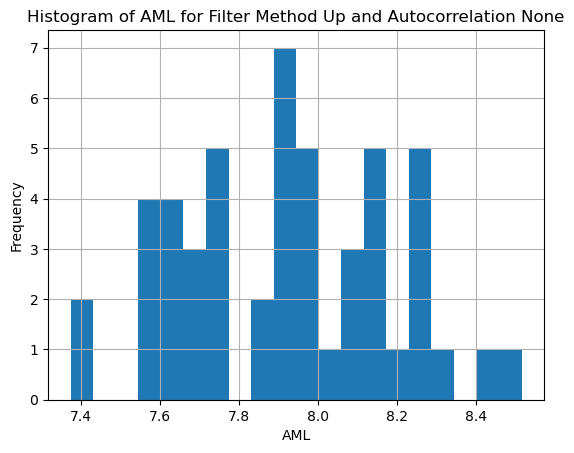

In [11]:
# for filter method up and AML autocorrelation none plot a histogram
results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'none')]['AML'].hist(bins=20)
plt.xlabel('AML')
plt.ylabel('Frequency')
plt.title('Histogram of AML for Filter Method Up and Autocorrelation None')
plt.show()